<center><h1> Exploratory Data Analysis of cars dataset (Part 3)</h1></center>

***

<center><h2> Multivariate descriptive statistics </h2></center>

Now it's time to see, which features of dataset are important and which are not so. I am going to use RandomForest Regressor module from scklearn library to analyze importance of features. Also, I wll use OneHotEncoder to make categorical features numeric.  
I will drop the NaN values for this example, because RandomForestRegressor doesn't take as an input data with missing values.
I will replace NaN values in urgency column, cause there is a lot of missing values there.  
And also I will drop power column, because of several reasons:
* Power column is dependent from capacity column on 87.5 per cent, we can see it above in correlation matrix
* Most of the people in KG doesn't care about the power, but do about capacity, that's why there are a lot of NaN values in power column, and a lot of impossible values
* Later in notebooks, we will see that power column actually deteriorate prediction accuracy

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from src.car_price_prediction.utils import df_utils

car_data.dropna(inplace=True)
car_data.drop(columns = ["Мощность"], inplace = True)

In [16]:
X,y = df_utils.get_data_and_target(car_data)
X_dummies = pd.get_dummies(X)
forest = RandomForestRegressor()
feat_labels = X_dummies.columns[:-1]
forest.fit(X_dummies,y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
    
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), forest.feature_importances_), X_dummies.columns.values), reverse=True))

Features sorted by their score:
[(0.4218, 'Год выпуска'), (0.3631, 'Объём'), (0.0802, 'Пробег'), (0.0186, 'Марка_porsche'), (0.013, 'Марка_mercedes-benz'), (0.0129, 'КПП_типтроник'), (0.0102, 'Тип кузова_хэтчбек'), (0.0065, 'Марка_lexus'), (0.0053, 'Тип кузова_минивэн / бус'), (0.0052, 'Тип кузова_седан'), (0.0052, 'Тип кузова_кроссовер'), (0.0045, 'Тип кузова_кабриолет'), (0.0044, 'Привод_передний'), (0.0037, 'Тип кузова_внедорожник / пикап'), (0.0035, 'Привод_постоянный полный'), (0.0026, 'Марка_toyota'), (0.0025, 'Цвет_черный'), (0.0025, 'Топливо_газ-бензин'), (0.0024, 'Топливо_дизель'), (0.0022, 'Тип кузова_купе'), (0.0022, 'Марка_уаз'), (0.0022, 'Марка_bmw'), (0.0018, 'КПП_механика'), (0.0016, 'Цвет_белый'), (0.0016, 'Топливо_бензин'), (0.0015, 'КПП_автомат'), (0.0014, 'Марка_cadillac'), (0.0013, 'Цвет_серый'), (0.0013, 'Марка_land rover'), (0.0011, 'Цвет_коричневый'), (0.001, 'Марка_kia'), (0.0009, 'Марка_nissan'), (0.0009, 'Марка_audi'), (0.0008, 'Марка_hyundai'), (0.0008, 'Марк

Now we will make use of dimensionality reduction algorithm which is called Principal Component Analysis(PCA). It will allow us to reduce the number of dimensions of a dataset. To visualize data I will reduce the number of dimensions to two. At first we will scale the whole dataset so it will have near to equal sizes. We will scale dataset via StandartScaler module of scikit learn module.From this plot we can see the distribution of data, and outliers as well.

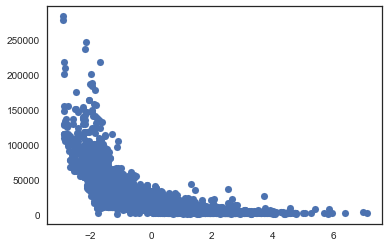

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

pca = PCA(n_components=1)
scaler = StandardScaler()
X_scaled = df_utils.scale_train(X)
X_pca = pd.get_dummies(X_scaled)
X_pca = pca.fit_transform(X_pca)
plt.scatter(X_pca,y,marker = "o",lw=0.1)